In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [19]:
#Read the file
import pandas
data=pd.read_csv("/content/Amazon_Reviews_Oneplus_Nord_CE2.csv",error_bad_lines=False)

<ipython-input-19-cf360a709a6b>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data=pd.read_csv("/content/Amazon_Reviews_Oneplus_Nord_CE2.csv",error_bad_lines=False)


In [20]:
data

,Unnamed: 0,Rating,Title,Review,Review_Date
0,0,1.0,Worst phone ever,Hang problem,25 February 2022
1,1,2.0,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,26 February 2022
2,2,5.0,Awesome look,Camera is so good n very fast phone back look ...,25 February 2022
3,3,3.0,One plus losing is originality!!!,The media could not be loaded.\n ...,28 February 2022
4,4,1.0,Read,I got my delivery on 23 feb when I unboxed the...,26 February 2022
...,...,...,...,...,...
4123,4123,1.0,Heating up,Heating up even for moderate use. Heat increas...,21 June 2022
4124,4124,5.0,Over all best,Very Nice,22 June 2022
4125,4125,1.0,Voice cut,All features are good but call cut frequently ...,16 June 2022
4126,4126,4.0,Battery backup is low,As it has fast charging but also drains the ba...,18 June 2022


In [21]:
data1=data["Review"]

In [22]:
data1

0                                            Hang problem
1       I'm writing this review after using 3days !!!B...
2       Camera is so good n very fast phone back look ...
3       The media could not be loaded.\n              ...
4       I got my delivery on 23 feb when I unboxed the...
                              ...                        
4123    Heating up even for moderate use. Heat increas...
4124                                            Very Nice
4125    All features are good but call cut frequently ...
4126    As it has fast charging but also drains the ba...
4127    Nice color... Camera is awsome..no lag olease ...
Name: Review, Length: 4128, dtype: object

In [23]:
data1=pd.DataFrame(data1)

In [24]:
data1

,Review
0,Hang problem
1,I'm writing this review after using 3days !!!B...
2,Camera is so good n very fast phone back look ...
3,The media could not be loaded.\n ...
4,I got my delivery on 23 feb when I unboxed the...
...,...
4123,Heating up even for moderate use. Heat increas...
4124,Very Nice
4125,All features are good but call cut frequently ...
4126,As it has fast charging but also drains the ba...


In [25]:
data1.dtypes

Review    object
dtype: object

In [26]:
x=[Review for Review in data1.Review if Review==float]
x

[]

In [27]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [28]:
data1['Review'] = data1['Review'].astype(str).str.lstrip('<').str.rstrip('+')

In [29]:
data1 = [x.strip() for x in data1.Review]#removing blank spaces
data1 = [x for x in data1 if x]#removing black lines

In [30]:
data1

['Hang problem',
 "I'm writing this review after using 3days !!!Be to honest this is normal Android phoneIt's not like OnePlusCamera quality very low it says 64mp but notSound also lowBattery 🔋 backup ok !!! For one day normal use itsIf ur Gamer don't go for itOverall price it High for this handsetIf u really wanna buy OnePlus ho for higher end modelI'm first time buying OnePlusLittle disappointment",
 "Camera is so good n very fast phone back look is awesomeWith dis price segment it's worth it n d most important thing is the phone has dedicated memory card slot I think dis is the first one plus phone which has d dedicated slot for memory cardBattery backup is also good n wit the help of 65w charger u can charge ur phone frm 50-100% in just 15 minsIt has the super vooc charger frm Dat u can charge ur phone very fastVery smooth touch n very fast phone u can play games with no lagInternet connectivity is also fast n lightning wit my Jio sim as u can c I hav pasted one photo showing d dow

In [32]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
#tokenizing
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data1))
sentences[0:15]

["Hang problem I'm writing this review after using 3days !",
 '!',
 "!Be to honest this is normal Android phoneIt's not like OnePlusCamera quality very low it says 64mp but notSound also lowBattery 🔋 backup ok !",
 '!!',
 "For one day normal use itsIf ur Gamer don't go for itOverall price it High for this handsetIf u really wanna buy OnePlus ho for higher end modelI'm first time buying OnePlusLittle disappointment Camera is so good n very fast phone back look is awesomeWith dis price segment it's worth it n d most important thing is the phone has dedicated memory card slot I think dis is the first one plus phone which has d dedicated slot for memory cardBattery backup is also good n wit the help of 65w charger u can charge ur phone frm 50-100% in just 15 minsIt has the super vooc charger frm Dat u can charge ur phone very fastVery smooth touch n very fast phone u can play games with no lagInternet connectivity is also fast n lightning wit my Jio sim as u can c I hav pasted one photo sh

In [34]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,Hang problem I'm writing this review after usi...
1,!
2,!Be to honest this is normal Android phoneIt's...
3,!!
4,For one day normal use itsIf ur Gamer don't go...
...,...
3471,Go for it Nice only I used second hand good pr...
3472,Heat increases if we use mobile internet or ...
3473,Very Nice All features are good but call cut f...
3474,Nice color...


In [36]:
#frequency of words
freq1 = pd.Series(' '.join(sent_df['sentence']).split()).value_counts()[:50] 
freq1

is          2704
and         1416
the         1211
not         1146
phone       1137
good        1014
this         932
to           907
in           852
for          751
I            750
a            703
very         663
camera       617
of           615
quality      589
it           577
with         533
but          503
battery      477
one          411
mobile       358
be           350
Good         349
The          346
Camera       343
are          325
Battery      285
like         283
on           275
you          270
as           264
from         245
product      243
plus         240
OnePlus      239
have         236
could        236
nan          235
my           235
price        230
also         226
that         215
buy          212
life         210
charging     206
fast         203
it's         202
was          198
all          193
dtype: int64

In [37]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
my_stopwords = stopwords.words('english')
my_stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [39]:
#removing stopwords
sent_df['sentence1'] = sent_df['sentence'].apply(lambda x: ' '.join([x for x in x.split() if x not in (my_stopwords)]))

In [41]:
#removing punctuations
sent_df['clean'] = sent_df['sentence1'].apply(lambda x: ' '.join([x for x in x.split() if x not in string.punctuation]))

In [42]:
sent_df

,sentence,sentence1,clean
0,Hang problem I'm writing this review after usi...,Hang problem I'm writing review using 3days !,Hang problem I'm writing review using 3days
1,!,!,
2,!Be to honest this is normal Android phoneIt's...,!Be honest normal Android phoneIt's like OnePl...,!Be honest normal Android phoneIt's like OnePl...
3,!!,!!,!!
4,For one day normal use itsIf ur Gamer don't go...,For one day normal use itsIf ur Gamer go itOve...,For one day normal use itsIf ur Gamer go itOve...
...,...,...,...
3471,Go for it Nice only I used second hand good pr...,Go Nice I used second hand good product nice q...,Go Nice I used second hand good product nice q...
3472,Heat increases if we use mobile internet or ...,Heat increases use mobile internet video recor...,Heat increases use mobile internet video recor...
3473,Very Nice All features are good but call cut f...,Very Nice All features good call cut frequentl...,Very Nice All features good call cut frequentl...
3474,Nice color...,Nice color...,Nice color...


In [43]:
sent_df=sent_df.drop('sentence',axis=1)

In [44]:
sent_df=sent_df.drop('sentence1',axis=1)

In [45]:
sent_df

,clean
0,Hang problem I'm writing review using 3days
1,
2,!Be honest normal Android phoneIt's like OnePl...
3,!!
4,For one day normal use itsIf ur Gamer go itOve...
...,...
3471,Go Nice I used second hand good product nice q...
3472,Heat increases use mobile internet video recor...
3473,Very Nice All features good call cut frequentl...
3474,Nice color...


In [46]:
from itertools import islice
def take(n,iterable):
    "Return first n items of the iterable as list"
    return list(islice(iterable,n))

In [47]:
#coverting to dic format and for 20 words
affinity_scores = afinn.set_index('word')['value'].to_dict()
take(20,affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [48]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        clean = nlp(text)
        for word in clean:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [49]:
#calulating the sentiment value for each sentence
sent_df['sentiment_value'] = sent_df['clean'].apply(calculate_sentiment)

In [50]:
#calulating the number of words in each sentence
sent_df['word_count'] = sent_df['clean'].str.split().apply(len)
sent_df['word_count'].head(10)

0      7
1      0
2     17
3      1
4    150
5     46
6     10
7     30
8      3
9     23
Name: word_count, dtype: int64

In [51]:
#sort based on sentiment value
sent_df.sort_values(by='sentiment_value').head(10)

,clean,sentiment_value,word_count
3319,Bad bad bad badBad bad bad badBad bad bad badB...,-51,40
3191,Camera average.. Maja nahe hai camera bad batt...,-23,47
3082,ProsFingerprintSpeedDisplayUI65W chargerCall q...,-13,66
1561,Vivo V17 camera far better.2) battry back poor...,-12,59
438,Now given 27 June date receiving parts repaire...,-12,24
1068,Worst experience oneplus.Heating problem..If o...,-11,64
943,Could've come Android 12 Dont buy one plus guy...,-10,67
3237,This phone bad ...camera quality poor .. batte...,-9,16
1363,Hard earned money wasted Camera poor sensor pr...,-8,25
2327,Awesome Excellent performance Lov 3 Month Use ...,-8,30


In [52]:
sent_df['sentiment_value'].describe() 

count    3476.000000
mean        2.657940
std         5.707405
min       -51.000000
25%         0.000000
50%         1.000000
75%         4.000000
max       114.000000
Name: sentiment_value, dtype: float64

In [53]:
#sentiment value less than or equal to 0
sent_df[sent_df['sentiment_value']<=0]

,clean,sentiment_value,word_count
0,Hang problem I'm writing review using 3days,-2,7
1,,0,0
3,!!,0,1
7,So plus point To amazonComing Back device I wo...,0,30
10,thanx amazon hasselfree exchange alot better F...,-3,17
...,...,...,...
3459,But one problem device shuts without prior war...,-4,10
3460,Worst product ever never thought brand can't h...,-3,9
3462,It ok price range.,0,4
3466,The media could loaded.,0,4


In [54]:
#sentiment value greater than 0
sent_df[sent_df['sentiment_value']>0]

,clean,sentiment_value,word_count
2,!Be honest normal Android phoneIt's like OnePl...,4,17
4,For one day normal use itsIf ur Gamer go itOve...,25,150
5,It’s A average product decent day day activity...,5,46
6,I bought 12499 1 Half year ago sold good price!!,3,10
8,yes taken oppo!!,1,3
...,...,...,...
3470,Battery good camera excellent.,6,4
3471,Go Nice I used second hand good product nice q...,6,20
3472,Heat increases use mobile internet video recor...,1,23
3473,Very Nice All features good call cut frequentl...,4,20


In [55]:
sent_df['index']=range(0,len(sent_df))

In [56]:
sent_df

,clean,sentiment_value,word_count,index
0,Hang problem I'm writing review using 3days,-2,7,0
1,,0,0,1
2,!Be honest normal Android phoneIt's like OnePl...,4,17,2
3,!!,0,1,3
4,For one day normal use itsIf ur Gamer go itOve...,25,150,4
...,...,...,...,...
3471,Go Nice I used second hand good product nice q...,6,20,3471
3472,Heat increases use mobile internet video recor...,1,23,3472
3473,Very Nice All features good call cut frequentl...,4,20,3473
3474,Nice color...,3,2,3474


<ipython-input-57-911d1c3938c2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

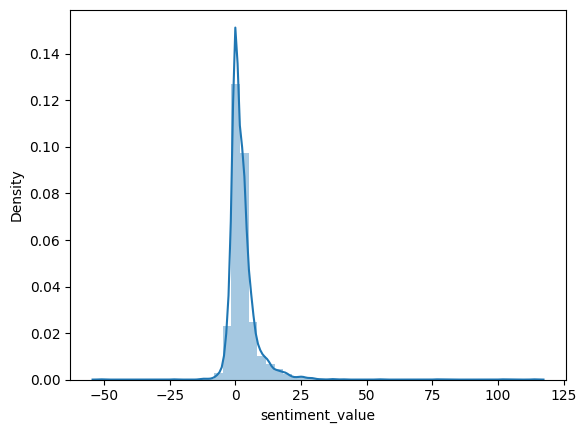

In [57]:
#densityplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

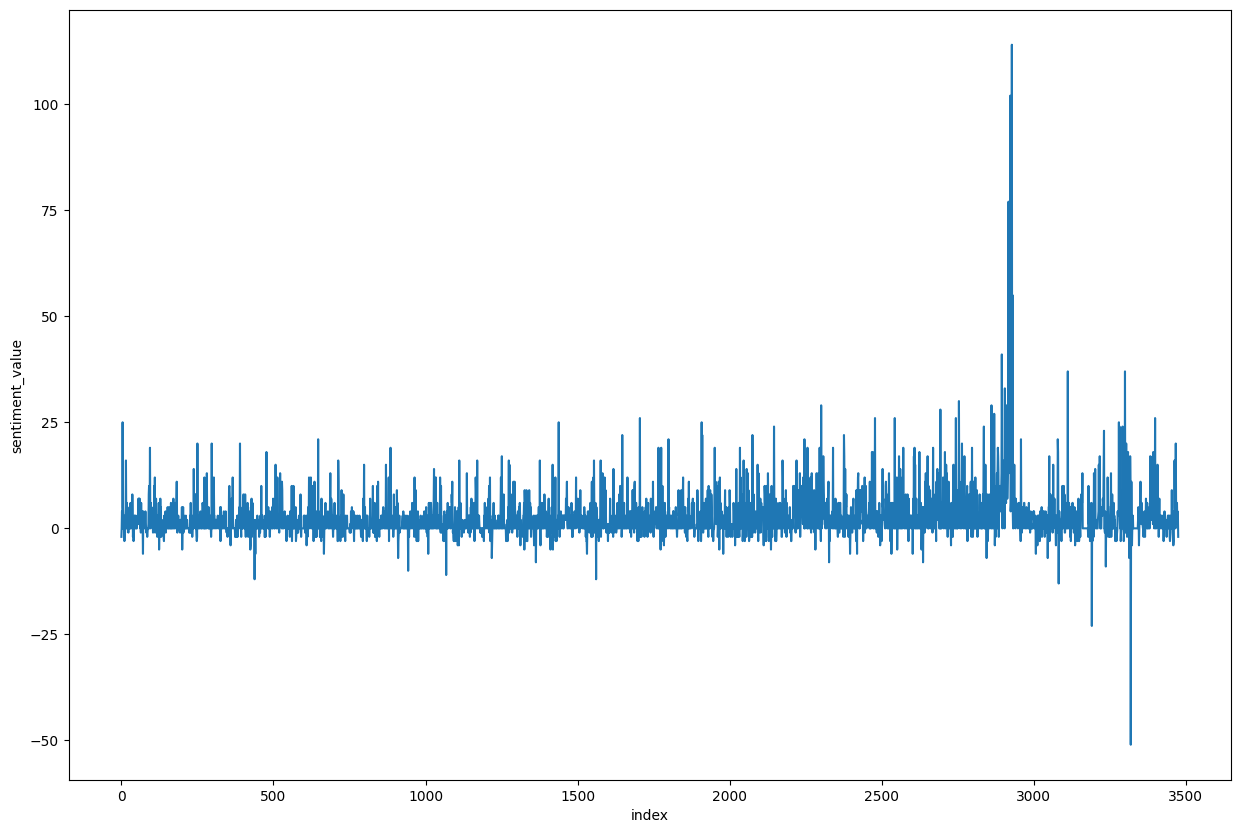

In [58]:
#lineplot based on sentiment value
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

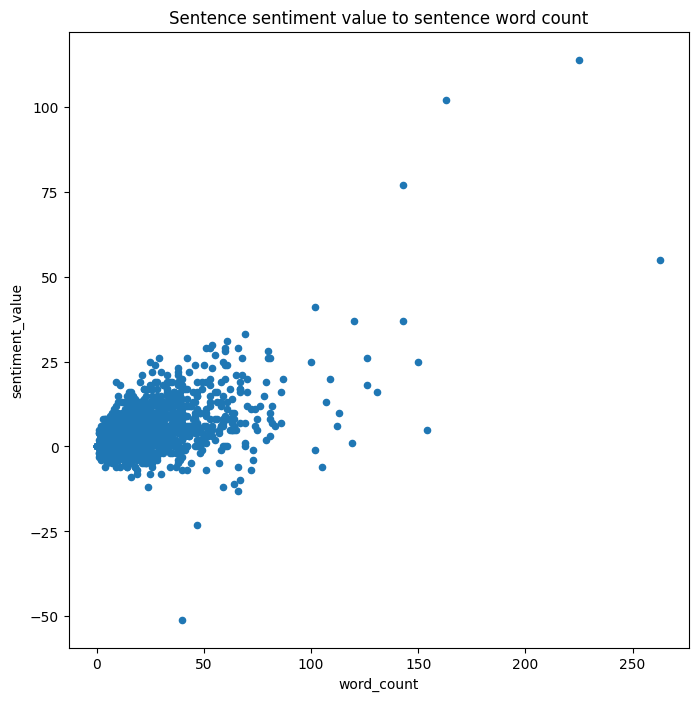

In [59]:
#scatterplot between wordcount and sentiment value
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

Here most of the reviews are neutral still negative reviews very less comparing to the postive.So from overall reviews we can conclude that its a good product